In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Import data
df = pd.read_csv('medical_examination.csv', index_col='id')


# Add 'overweight' column
df['overweight'] = np.where((df['weight']/((df['height']/100)**2)) > 25, 1, 0)
df['cholesterol'] = np.where(df['cholesterol'] == 1, 0, 1)
df['gluc'] = np.where(df['gluc'] == 1, 0, 1)

df


,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1


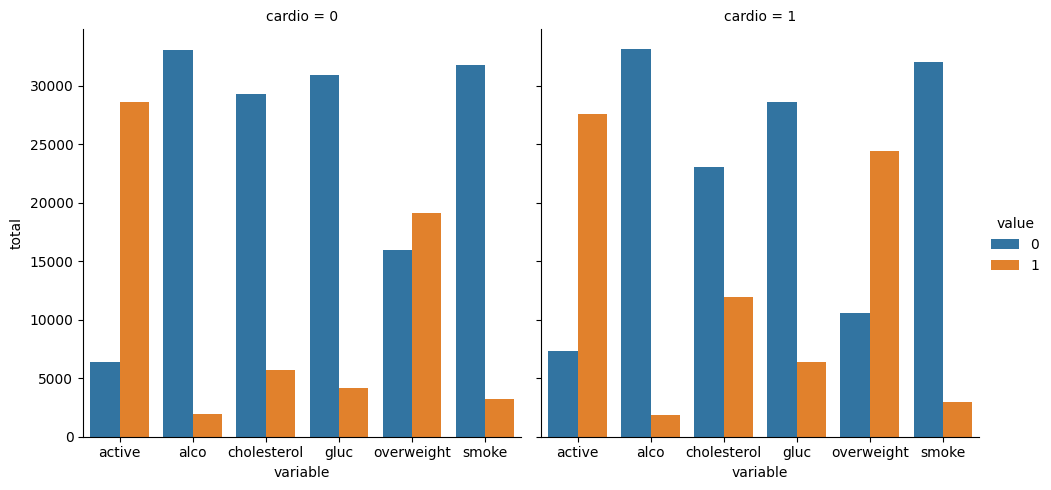

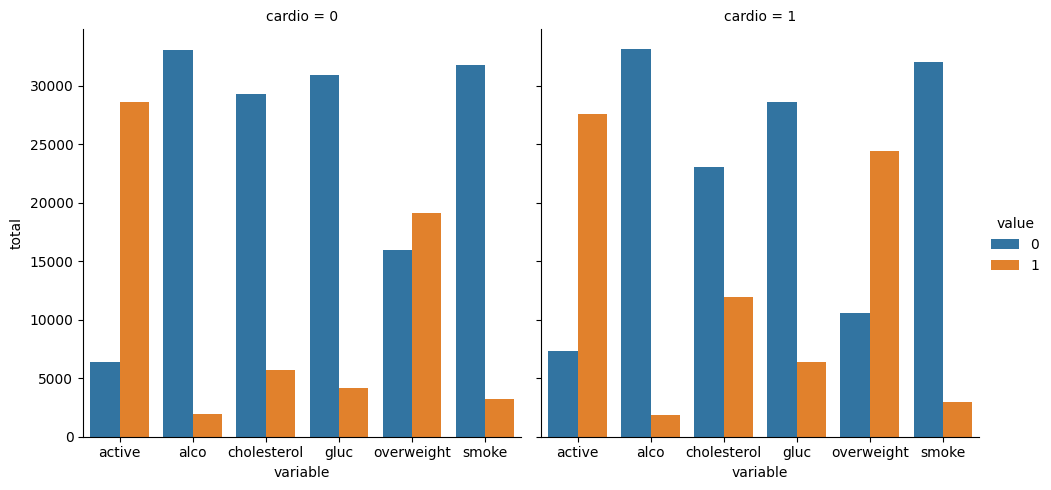

In [5]:
vars = sorted(["cholesterol", "gluc", "smoke", "alco", "active", "overweight"])

df_cat = df.melt(id_vars=['cardio'],value_vars=vars)
df_cat = df_cat.value_counts().reset_index(name='total')
df_cat



fig = sns.catplot(data=df_cat,
x='variable',
y='total',
hue='value',
col='cardio',
kind='bar',
order=vars)
fig.set_ylabels("total")
fig.set_xlabels("variable")
fig = fig.fig
fig

<AxesSubplot: >

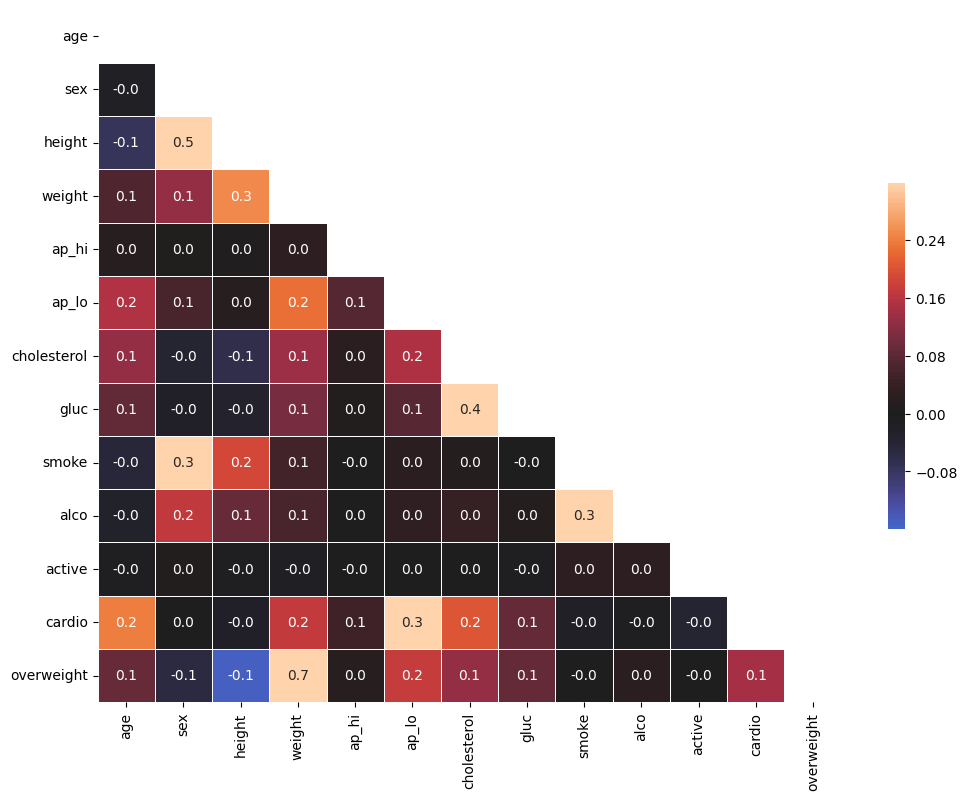

In [6]:
df_heat = df.loc[df['ap_lo'] <= df['ap_hi']]
df_heat = df_heat.loc[df['height'] >= df['height'].quantile(0.025)]
df_heat = df_heat.loc[df['weight'] >= df['weight'].quantile(0.025)]
df_heat = df_heat.loc[df['height'] <= df['height'].quantile(0.975)]
df_heat = df_heat.loc[df['weight'] <= df['weight'].quantile(0.975)]
matrix = df_heat.corr()
mask = np.triu(np.ones_like(matrix, dtype=bool))
fig, ax = plt.subplots(figsize=(12,9))
sns.heatmap(data=matrix,
            annot=True,
            mask=mask,
            fmt=".1f",
            vmax=0.32,
            vmin=-0.16,
            linewidths=.6,
            center=0,
            cbar_kws={"shrink": 0.5, 'ticks': [-0.08, 0.00, 0.08, 0.16, 0.24]})

In [103]:
def draw_heat_map():
  # Clean the data
  df_heat = df.loc[df['ap_lo'] <= df['ap_hi']]
  df_heat = df_heat.loc[df['height'] >= df['height'].quantile(0.025)]
  df_heat = df_heat.loc[df['weight'] >= df['weight'].quantile(0.025)]
  df_heat = df_heat.loc[df['height'] <= df['height'].quantile(0.975)]
  df_heat = df_heat.loc[df['weight'] <= df['weight'].quantile(0.975)]

  # Calculate the correlation matrix
  corr = df_heat.corr()

  # Generate a mask for the upper triangle
  mask = np.triu(np.ones_like(corr, dtype=bool))

  # Set up the matplotlib figure
  fig, ax = plt.subplots(figsize=(11,9))

  # Draw the heatmap with 'sns.heatmap()'
  sns.heatmap(data=corr,
            annot=True,
            mask=mask,
            fmt=".1f",
            vmax=0.32,
            vmin=-0.16,
            linewidths=.6,
            center=0,
            cbar_kws={"shrink": 0.5, 'ticks': [-0.08, 0.00, 0.08, 0.16, 0.24]})
  return fig